## Flow of project:
1. Data collection
2. Data preprocessing
3. Model training and testing
4. Website
5. deployment

## Importing libraries

In [43]:
import pandas as pd
import numpy as np

## Load data

In [44]:
movies = pd.read_csv('Data/tmdb_5000_movies.csv')
credits = pd.read_csv('Data/tmdb_5000_credits.csv')

In [45]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [46]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


## Pre processing

In [47]:
print(movies.shape)
print(credits.shape)

(4803, 20)
(4803, 4)


In [48]:
# merging movies and credits

In [49]:
movies = movies.merge(credits, on="title")
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [50]:
movies.shape

(4809, 23)

In [51]:
# dropping useless columns
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [52]:
movies = movies[['movie_id', 'title', 'cast', 'crew', 'genres', 'keywords', 'overview']]
movies.head()

,movie_id,title,cast,crew,genres,keywords,overview
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca..."


In [53]:
# Missing values
movies.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
genres      0
keywords    0
overview    3
dtype: int64

In [54]:
movies.dropna(inplace=True)

In [55]:
movies.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
genres      0
keywords    0
overview    0
dtype: int64

In [56]:
# removing duplicates
movies.duplicated().sum()

0

In [57]:
# handling genres
movies.head(1)

,movie_id,title,cast,crew,genres,keywords,overview
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di..."


In [58]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [59]:
# we want the genres in the form ['Action', 'Adventure', 'Fnatasy', 'Science Fiction']

In [60]:
import ast

In [61]:
def objToArray(obj):
    l = []
    for i in ast.literal_eval(obj):
        l.append(i['name'])
    return l

In [62]:
# sample
objToArray('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [63]:
movies['genres'] = movies['genres'].apply(objToArray)

In [64]:
movies.head()

,movie_id,title,cast,crew,genres,keywords,overview
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca..."


In [65]:
movies['keywords'] = movies['keywords'].apply(objToArray)

In [66]:
movies.head()

,movie_id,title,cast,crew,genres,keywords,overview
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca..."


In [67]:
def CastObjToArray(obj):
    l = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter < 5:
            l.append(i['character'])
        counter = counter + 1
    return l

In [68]:
movies['cast'] = movies['cast'].apply(CastObjToArray)

In [69]:
movies.head(5)

,movie_id,title,cast,crew,genres,keywords,overview
0,19995,Avatar,"[Jake Sully, Neytiri, Dr. Grace Augustine, Col...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[Captain Jack Sparrow, Will Turner, Elizabeth ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,"[James Bond, Blofeld, Madeleine, M, Lucia]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,"[Bruce Wayne / Batman, Alfred Pennyworth, Jame...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...
4,49529,John Carter,"[John Carter, Dejah Thoris, Sola, Tars Tarkas,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca..."


In [70]:
# we need the directprs name from the crew column
movies.iloc[0].crew

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [71]:
def director(obj):
    l=[]
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            l.append(i['name'])
    return l

In [72]:
movies['crew'] = movies['crew'].apply(director)
movies.head()

,movie_id,title,cast,crew,genres,keywords,overview
0,19995,Avatar,"[Jake Sully, Neytiri, Dr. Grace Augustine, Col...",[James Cameron],"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[Captain Jack Sparrow, Will Turner, Elizabeth ...",[Gore Verbinski],"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,"[James Bond, Blofeld, Madeleine, M, Lucia]",[Sam Mendes],"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,"[Bruce Wayne / Batman, Alfred Pennyworth, Jame...",[Christopher Nolan],"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...
4,49529,John Carter,"[John Carter, Dejah Thoris, Sola, Tars Tarkas,...",[Andrew Stanton],"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca..."


In [73]:
# we need to remove the spaces from the names in the actors and directors
def collapse(obj):
    l=[]
    for i in obj:
        l.append(i.replace(" ", ""))
    return l

In [74]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keyword'] = movies['keywords'].apply(collapse)

movies.head()

,movie_id,title,cast,crew,genres,keywords,overview,keyword
0,19995,Avatar,"[JakeSully, Neytiri, Dr.GraceAugustine, Col.Qu...",[JamesCameron],"[Action, Adventure, Fantasy, ScienceFiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[cultureclash, future, spacewar, spacecolony, ..."
1,285,Pirates of the Caribbean: At World's End,"[CaptainJackSparrow, WillTurner, ElizabethSwan...",[GoreVerbinski],"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[ocean, drugabuse, exoticisland, eastindiatrad..."
2,206647,Spectre,"[JamesBond, Blofeld, Madeleine, M, Lucia]",[SamMendes],"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,"[spy, basedonnovel, secretagent, sequel, mi6, ..."
3,49026,The Dark Knight Rises,"[BruceWayne/Batman, AlfredPennyworth, JamesGor...",[ChristopherNolan],"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[dccomics, crimefighter, terrorist, secretiden..."
4,49529,John Carter,"[JohnCarter, DejahThoris, Sola, TarsTarkas, Ta...",[AndrewStanton],"[Action, Adventure, ScienceFiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","[basedonnovel, mars, medallion, spacetravel, p..."


In [75]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [76]:
movies['tags'] = movies['overview']+movies['genres']+movies['cast']+movies['crew']+movies['keywords']

In [77]:
movies.head(2)

,movie_id,title,cast,crew,genres,keywords,overview,keyword,tags
0,19995,Avatar,"[JakeSully, Neytiri, Dr.GraceAugustine, Col.Qu...",[JamesCameron],"[Action, Adventure, Fantasy, ScienceFiction]","[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[CaptainJackSparrow, WillTurner, ElizabethSwan...",[GoreVerbinski],"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d...","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d..."


In [78]:
movies.iloc[0].tags

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'JakeSully',
 'Neytiri',
 'Dr.GraceAugustine',
 'Col.Quaritch',
 'TrudyChacon',
 'JamesCameron',
 'culture clash',
 'future',
 'space war',
 'space colony',
 'society',
 'space travel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alien planet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'love affair',
 'anti war',
 'power relations',
 'mind and soul',
 '3d']

In [83]:
new_df = movies.drop(columns=['overview', 'genres', 'keywords', 'cast', 'crew', 'keyword'])

In [84]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [85]:
new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))

In [86]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [87]:
new_df.iloc[0].tags

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction JakeSully Neytiri Dr.GraceAugustine Col.Quaritch TrudyChacon JamesCameron culture clash future space war space colony society space travel futuristic romance space alien tribe alien planet cgi marine soldier battle love affair anti war power relations mind and soul 3d'

In [90]:
# convert everything to lower case
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


### We perform stemming

<p> Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”. Stemming is an important part of the pipelining process in Natural language processing. The input to the stemmer is tokenized words. How do we get these tokenized words? Well, tokenization involves breaking down the document into different words. 

Stemming is a natural language processing technique that is used to reduce words to their base form, also known as the root form. The process of stemming is used to normalize text and make it easier to process. It is an important step in text pre-processing, and it is commonly used in information retrieval and text mining applications. </p>

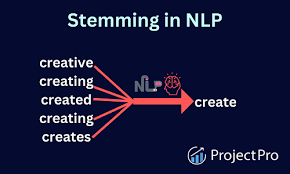

In [92]:
!pip install nltk

     ---------------------------------------- 1.5/1.5 MB 2.0 MB/s eta 0:00:00
     -------------------------------------- 268.4/268.4 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 kB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 77.1/77.1 kB 4.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [93]:
import nltk

In [94]:
from nltk.stem.porter import PorterStemmer

In [95]:
ps = PorterStemmer()

In [96]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [97]:
# test
stem('In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction JakeSully Neytiri Dr.GraceAugustine Col.Quaritch TrudyChacon JamesCameron culture clash future space war space colony society space travel futuristic romance space alien tribe alien planet cgi marine soldier battle love affair anti war power relations mind and soul 3d')

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict jakesulli neytiri dr.graceaugustin col.quaritch trudychacon jamescameron cultur clash futur space war space coloni societi space travel futurist romanc space alien tribe alien planet cgi marin soldier battl love affair anti war power relat mind and soul 3d'

In [100]:
new_df['tags'] = new_df['tags'].apply(stem)
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."


### Countvectorizer
Countvectorizer is a method to convert text to numerical data. To show you how it works let’s take an example:
<br>
``text = [‘Hello my name is james, this is my python notebook’] ``<br>
The text is transformed to a sparse matrix as shown below.

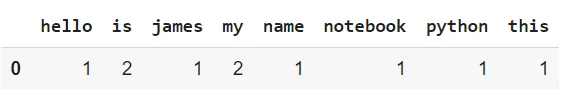

In [101]:
from sklearn.feature_extraction.text import CountVectorizer

In [104]:
cv = CountVectorizer(max_features=5000, stop_words="english")

In [108]:
vector = cv.fit_transform(new_df['tags']).toarray()
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [109]:
from sklearn.metrics.pairwise import cosine_similarity

In [110]:
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.07188852, 0.05270463, ..., 0.04767313, 0.        ,
        0.        ],
       [0.07188852, 1.        , 0.04546629, ..., 0.04112581, 0.        ,
        0.02248469],
       [0.05270463, 0.04546629, 1.        , ..., 0.02010076, 0.        ,
        0.        ],
       ...,
       [0.04767313, 0.04112581, 0.02010076, ..., 1.        , 0.0360375 ,
        0.03976214],
       [0.        , 0.        , 0.        , ..., 0.0360375 , 1.        ,
        0.07881104],
       [0.        , 0.02248469, 0.        , ..., 0.03976214, 0.07881104,
        1.        ]])

In [111]:
similarity.shape

(4806, 4806)

In [112]:
# distance of movie 1 from each of the movies 
similarity[0]

array([1.        , 0.07188852, 0.05270463, ..., 0.04767313, 0.        ,
       0.        ])

## Recommendations

In [118]:
def recommend(movie):
    index = new_df[new_df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])
    for i in distances[1:6]:
        print(new_df.iloc[i[0]].title)

In [123]:
recommend('Cheaper by the Dozen 2')

Love the Coopers
Eulogy
National Lampoon's Vacation
This Christmas
The Master of Disguise


In [124]:
import pickle

In [125]:
pickle.dump(new_df, open('Models/movie_list.pkl', 'wb'))

In [126]:
pickle.dump(similarity, open('Models/similarity.pkl', 'wb'))